Импортируем библиотеку

In [1]:
%%time
from TSEnsemble import utils, nn, arima

CPU times: total: 4.91 s
Wall time: 5.63 s


Преобразуем .csv файл в DataFrame, состоящий из 1 столбца со значениями <br> временного ряда (column) и индекса, содержащего даты (index).

In [2]:
%%time
path = "datasets\\ee-chart2.csv"
dataset = utils.ts_from_csv(path, column = 1, index = 0)


CPU times: total: 0 ns
Wall time: 11 ms


Декомпозируем временной ряд на составляющие: тренд, сезонность, остатки.

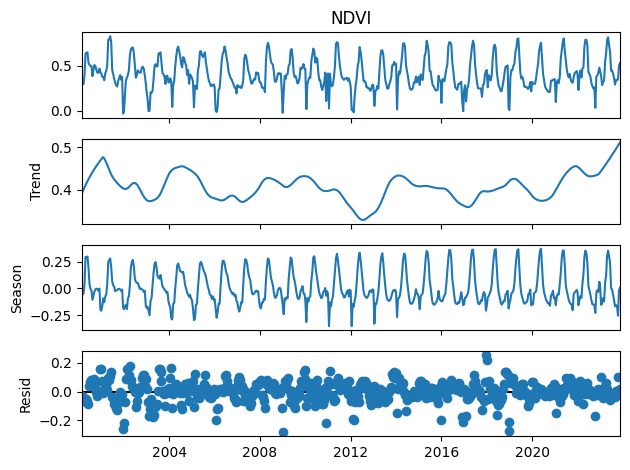

CPU times: total: 1.11 s
Wall time: 1.11 s


In [3]:
%%time
utils.plot_decompose(path, period = 23)

Строим функцию автокорелляции для временного ряда, по ней можно увидеть сезонность ряда.

CPU times: total: 31.2 ms
Wall time: 30 ms


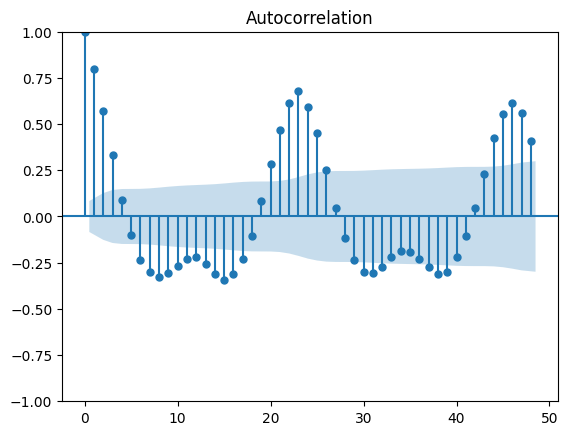

In [4]:
%%time
from statsmodels.graphics.tsaplots import plot_acf
utils.plot_acf(path, lags = 48)

Проверим ряд на стационарность, используя 2 теста: KPSS и ADF. <br> Также нарисуем график временного ряда, средних значений <br> и стандартных отклонений прошлых window значений (по умолчанию 2% датасета)

ADF test: 
 stat       -5.443004
pval        0.000003
lags       19.000000
numobs    527.000000
1%         -3.442820
5%         -2.867040
10%        -2.569699
dtype: float64
KPSS test:  stat     0.054685
pval     0.100000
lags    11.000000
10%      0.347000
5%       0.463000
2.5%     0.574000
1%       0.739000
dtype: float64
CPU times: total: 78.1 ms
Wall time: 76 ms


C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:172: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  test_kpss = kpss(ts)


True

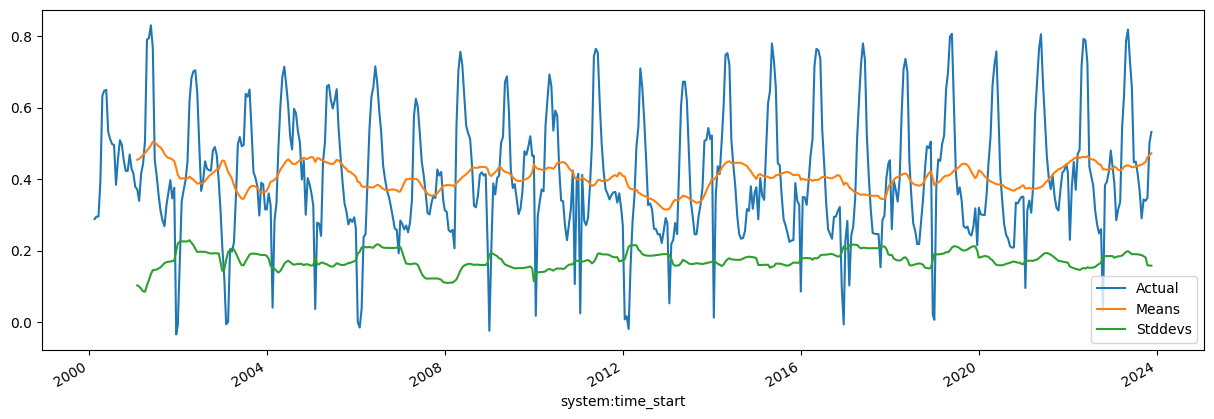

In [5]:
%%time
utils.isStationary(path, window = 23, plot = True)

Автоматически найдем наиболее оптимальные коэффициенты для SARIMA модели по критерию AIC и построим модель.

C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  test_kpss = kpss(ts)


SARMA[2, 0, 2] [1, 0, 1, 23] AIC:inf  Time_Taken:4.031
SARMA[0, 0, 0] [0, 0, 0, 23] AIC:-315.632  Time_Taken:0.062
SARMA[1, 0, 0] [1, 0, 0, 23] AIC:-898.429  Time_Taken:1.469
SARMA[0, 0, 1] [0, 0, 1, 23] AIC:-742.981  Time_Taken:0.922
SARMA[0, 0, 0] [1, 0, 0, 23] AIC:-610.675  Time_Taken:0.484
SARMA[1, 0, 0] [0, 0, 0, 23] AIC:-818.947  Time_Taken:0.078
SARMA[2, 0, 0] [1, 0, 0, 23] AIC:-899.919  Time_Taken:1.047
SARMA[1, 0, 0] [1, 0, 0, 23] AIC:-898.429  Time_Taken:1.516
SARMA[2, 0, 0] [0, 0, 0, 23] AIC:-834.512  Time_Taken:0.047
SARMA[3, 0, 0] [1, 0, 0, 23] AIC:-899.642  Time_Taken:1.875
SARMA[2, 0, 1] [1, 0, 0, 23] AIC:-920.177  Time_Taken:3.578
SARMA[1, 0, 1] [1, 0, 0, 23] AIC:-899.508  Time_Taken:1.062
SARMA[2, 0, 1] [0, 0, 0, 23] AIC:-880.552  Time_Taken:0.375
SARMA[3, 0, 1] [1, 0, 0, 23] AIC:-918.328  Time_Taken:3.750
SARMA[2, 0, 2] [1, 0, 0, 23] AIC:-918.119  Time_Taken:3.703
SARMA[2, 0, 1] [2, 0, 0, 23] AIC:-933.132  Time_Taken:16.219
SARMA[1, 0, 1] [2, 0, 0, 23] AIC:-923.957  T

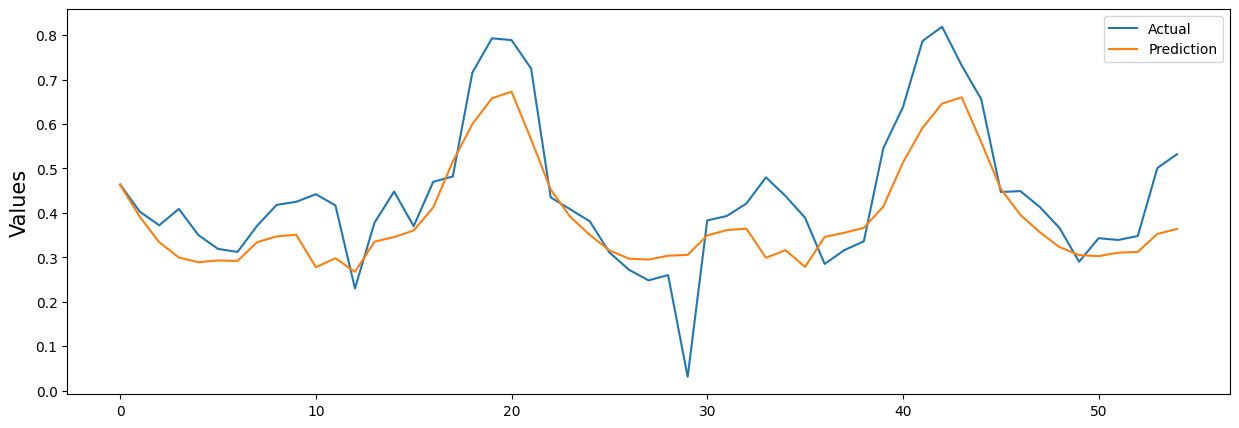

    prediction  actual
0     0.462997   0.464
1     0.391658   0.403
2     0.333834   0.372
3     0.299609   0.409
4     0.288854   0.350
5     0.292859   0.319
6     0.291836   0.312
7     0.334038   0.371
8     0.347064   0.418
9     0.350684   0.425
10    0.277656   0.442
11    0.297842   0.417
12    0.267142   0.230
13    0.335216   0.378
14    0.345516   0.448
15    0.360356   0.370
16    0.412247   0.470
17    0.515870   0.482
18    0.599917   0.716
19    0.658082   0.793
20    0.672934   0.789
21    0.565545   0.725
22    0.452691   0.435
23    0.391165   0.408
24    0.350366   0.381
25    0.315607   0.311
26    0.297006   0.272
27    0.294855   0.248
28    0.303458   0.260
29    0.305568   0.031
30    0.349211   0.383
31    0.361179   0.393
32    0.364537   0.421
33    0.298935   0.480
34    0.316000   0.438
35    0.278371   0.389
36    0.345943   0.285
37    0.355160   0.316
38    0.366272   0.336
39    0.414489   0.546
40    0.513505   0.638
41    0.591247   0.787
42    0.645

In [6]:
%%time
ar = arima.auto_arima(dataset,
                            method = 'stepwise',
                            season = 23,
                            max_p = 3,
                            max_q = 3,
                            max_Q = 3,
                            max_P = 3,
                            train_split = 0.9,
                            plot = True)

Построим CNN, LSTM, GRU, Transformer модели, пытаясь подобрать оптимальные параметры.

2/2 [==============================] - 0s 2ms/step


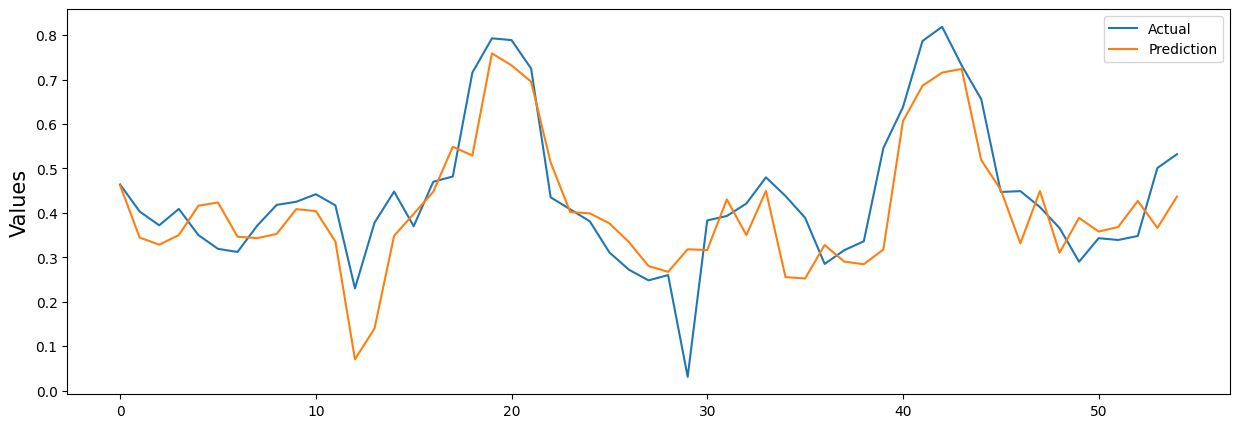

    prediction  actual
0     0.461922   0.464
1     0.344371   0.403
2     0.328445   0.372
3     0.350010   0.409
4     0.416104   0.350
5     0.423430   0.319
6     0.346397   0.312
7     0.343135   0.371
8     0.352622   0.418
9     0.408430   0.425
10    0.404066   0.442
11    0.335621   0.417
12    0.070409   0.230
13    0.139818   0.378
14    0.348432   0.448
15    0.397777   0.370
16    0.447442   0.470
17    0.548971   0.482
18    0.529008   0.716
19    0.759154   0.793
20    0.732119   0.789
21    0.695424   0.725
22    0.513401   0.435
23    0.401753   0.408
24    0.398867   0.381
25    0.376439   0.311
26    0.334240   0.272
27    0.280352   0.248
28    0.267193   0.260
29    0.318068   0.031
30    0.316228   0.383
31    0.430181   0.393
32    0.350056   0.421
33    0.449380   0.480
34    0.255405   0.438
35    0.252294   0.389
36    0.327706   0.285
37    0.290336   0.316
38    0.284352   0.336
39    0.317588   0.546
40    0.606408   0.638
41    0.686144   0.787
42    0.715

In [7]:
%%time
cnn = nn.make_cnn(dataset,
                  look_back = 23,
                  hidden_layers = 3,
                  train_size = 0.9,
                  kernel_size = 2,
                  filters = 64,
                  dilation_rate = 1,
                  dilation_mode = "multiplicative")

2/2 [==============================] - 0s 5ms/step


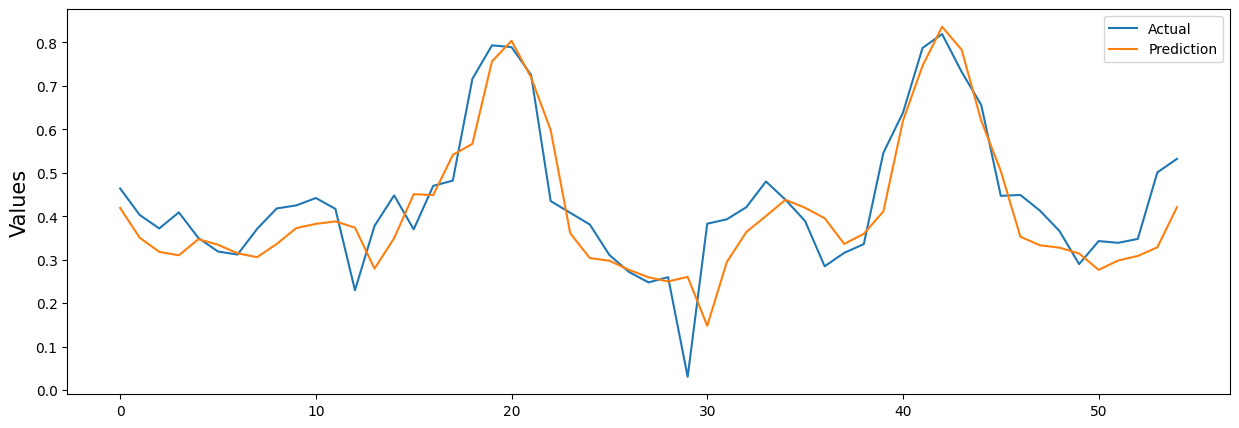

    prediction  actual
0     0.419148   0.464
1     0.350725   0.403
2     0.318229   0.372
3     0.310332   0.409
4     0.347289   0.350
5     0.334658   0.319
6     0.314887   0.312
7     0.305943   0.371
8     0.336415   0.418
9     0.372843   0.425
10    0.382606   0.442
11    0.388257   0.417
12    0.373932   0.230
13    0.279723   0.378
14    0.349620   0.448
15    0.450816   0.370
16    0.448829   0.470
17    0.541007   0.482
18    0.566608   0.716
19    0.756007   0.793
20    0.803411   0.789
21    0.719124   0.725
22    0.597993   0.435
23    0.360928   0.408
24    0.303933   0.381
25    0.297885   0.311
26    0.276827   0.272
27    0.259809   0.248
28    0.250148   0.260
29    0.260701   0.031
30    0.148291   0.383
31    0.294715   0.393
32    0.364002   0.421
33    0.400542   0.480
34    0.437987   0.438
35    0.419520   0.389
36    0.395526   0.285
37    0.336451   0.316
38    0.359702   0.336
39    0.411303   0.546
40    0.619485   0.638
41    0.745847   0.787
42    0.835

In [8]:
%%time
lstm = nn.make_rnn(dataset,
                  look_back = 23,
                  units = 64,
                  hidden_layers = 1,
                  train_size = 0.9,
                  type = "LSTM",
                  epochs = 20,
                  batch_size = 16,
                  dropout = 0.0,
                  maxPlot = 100)

2/2 [==============================] - 0s 3ms/step


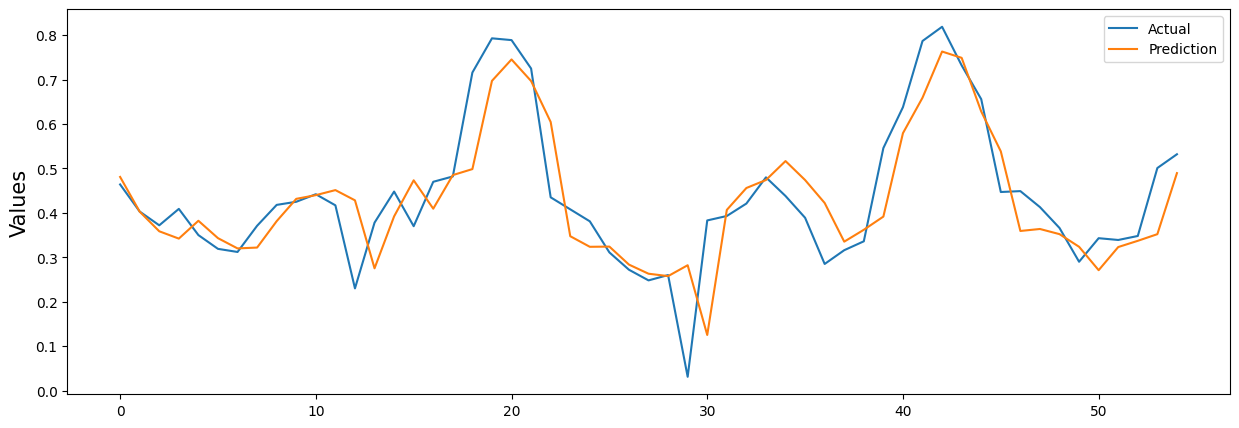

    prediction  actual
0     0.480943   0.464
1     0.402749   0.403
2     0.358569   0.372
3     0.342091   0.409
4     0.382238   0.350
5     0.343099   0.319
6     0.320004   0.312
7     0.321935   0.371
8     0.381397   0.418
9     0.431597   0.425
10    0.439919   0.442
11    0.451280   0.417
12    0.428264   0.230
13    0.275207   0.378
14    0.392142   0.448
15    0.473348   0.370
16    0.409439   0.470
17    0.485083   0.482
18    0.498590   0.716
19    0.697247   0.793
20    0.745442   0.789
21    0.696857   0.725
22    0.604653   0.435
23    0.347484   0.408
24    0.323642   0.381
25    0.324066   0.311
26    0.283564   0.272
27    0.263031   0.248
28    0.257631   0.260
29    0.282154   0.031
30    0.125139   0.383
31    0.406681   0.393
32    0.456005   0.421
33    0.474035   0.480
34    0.516660   0.438
35    0.473952   0.389
36    0.422288   0.285
37    0.335225   0.316
38    0.361947   0.336
39    0.391654   0.546
40    0.579440   0.638
41    0.659304   0.787
42    0.763

In [9]:
%%time
gru = nn.make_rnn(dataset,
                  look_back = 23,
#                   hidden_layers = 3,
#                   units = [64,128,64],
                  hidden_layers = 1,
                  units = 64,
                  train_size = 0.9,
                  type = "GRU",
                  dropout = 0.0,
                  maxPlot = 100)

2/2 [==============================] - 0s 32ms/step


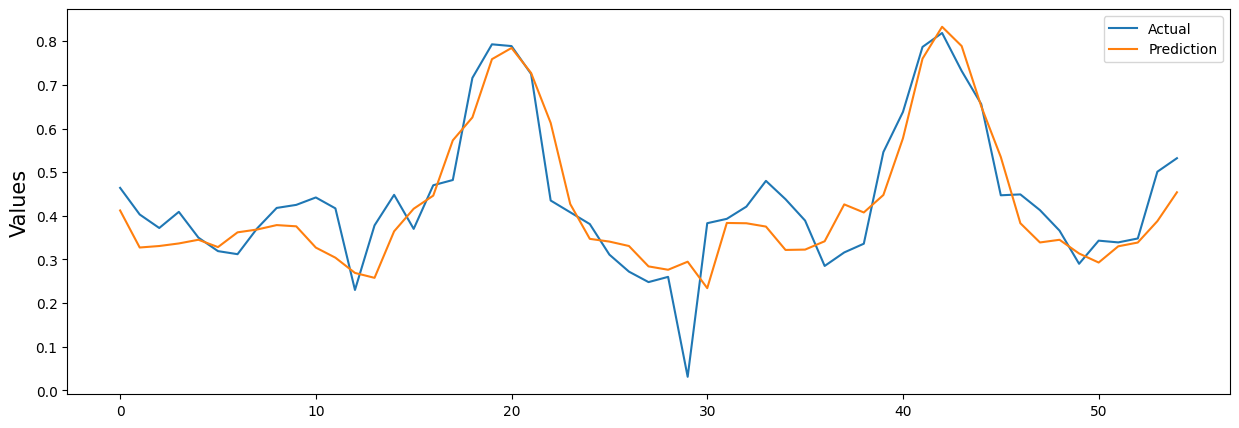

    prediction  actual
0     0.412205   0.464
1     0.327286   0.403
2     0.330720   0.372
3     0.336594   0.409
4     0.345062   0.350
5     0.328239   0.319
6     0.362051   0.312
7     0.368531   0.371
8     0.378674   0.418
9     0.375861   0.425
10    0.327110   0.442
11    0.303980   0.417
12    0.269021   0.230
13    0.257768   0.378
14    0.364384   0.448
15    0.416132   0.370
16    0.446227   0.470
17    0.572944   0.482
18    0.625467   0.716
19    0.758965   0.793
20    0.784648   0.789
21    0.727328   0.725
22    0.612843   0.435
23    0.426908   0.408
24    0.347110   0.381
25    0.340887   0.311
26    0.330732   0.272
27    0.284015   0.248
28    0.276281   0.260
29    0.294764   0.031
30    0.234141   0.383
31    0.383554   0.393
32    0.382873   0.421
33    0.375267   0.480
34    0.321718   0.438
35    0.322503   0.389
36    0.341616   0.285
37    0.426084   0.316
38    0.407626   0.336
39    0.447643   0.546
40    0.577557   0.638
41    0.760079   0.787
42    0.833

In [10]:
%%time
transformer = nn.make_transformer(dataset, 
                    look_back = 23, 
                    train_size = 0.9,
                    maxPlot = 100, 
                    batch_size = 32,
                    epochs = 30,
                    verbose = 0,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

Построим acl модель, используя параметры для моделей, подобранные ранее.

AIC:  -972.1921191338822
2/2 [==============================] - 2s 239ms/step


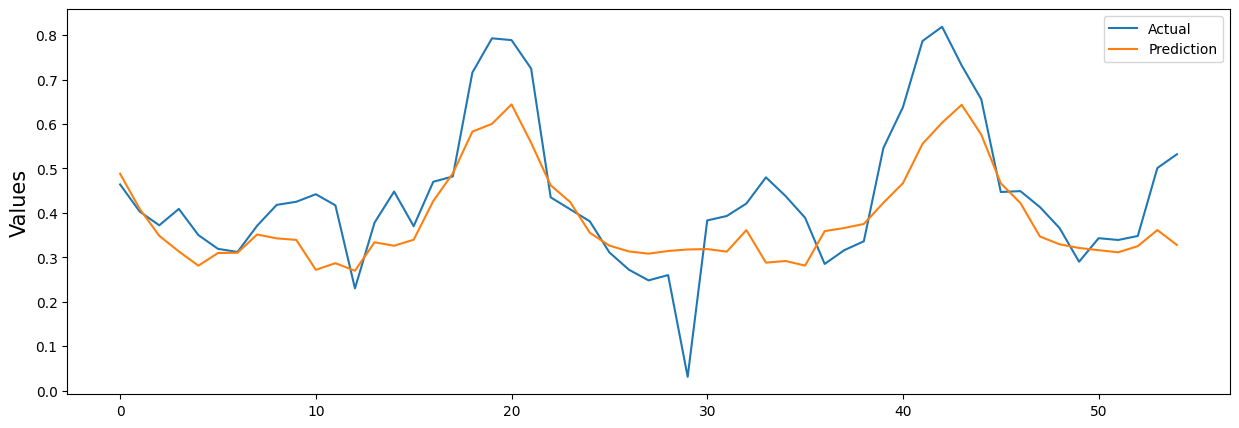

    prediction  actual
0     0.488123   0.464
1     0.409095   0.403
2     0.348352   0.372
3     0.313224   0.409
4     0.281140   0.350
5     0.309681   0.319
6     0.310222   0.312
7     0.351394   0.371
8     0.342619   0.418
9     0.339224   0.425
10    0.271849   0.442
11    0.286744   0.417
12    0.269717   0.230
13    0.333794   0.378
14    0.325991   0.448
15    0.339574   0.370
16    0.426623   0.470
17    0.488901   0.482
18    0.582980   0.716
19    0.600412   0.793
20    0.644252   0.789
21    0.557874   0.725
22    0.462124   0.435
23    0.424169   0.408
24    0.355235   0.381
25    0.326327   0.311
26    0.313243   0.272
27    0.308166   0.248
28    0.314195   0.260
29    0.317606   0.031
30    0.318503   0.383
31    0.312767   0.393
32    0.361223   0.421
33    0.287969   0.480
34    0.291651   0.438
35    0.281363   0.389
36    0.358912   0.285
37    0.365967   0.316
38    0.375060   0.336
39    0.422658   0.546
40    0.466858   0.638
41    0.555369   0.787
42    0.603

In [21]:
%%time
acl = nn.ACL()
acl = acl.fit(dataset,
              order = (2, 0, 1), 
              seasonal_order = (2, 0, 1, 23), 
              look_back = 23,
              train_size= 0.9, 
              filters = 64, 
              cnn_layers = 1, 
              dilation_mode = "multiplicative", 
              lstm_layers = 3,
              units = [64,128,64], 
              kernel_size = 2, 
              epochs = 40)


Сгенерируем ненатреннированные модели с уже подобранными параметрами, <br> и создаздим ансамблевую модель, которая будет использовать алгоритм catboost

2/2 [==============================] - 0s 3ms/step
model 0 : <class 'keras.engine.sequential.Sequential'>, mae = 0.05621623999519008 

2/2 [==============================] - 0s 4ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, mae = 0.061524017480867256 

2/2 [==============================] - 0s 41ms/step
model 2 : <class 'keras.engine.functional.Functional'>, mae = 0.06043470848032407 

Learning rate set to 0.403378
0:	learn: 0.1403850	test: 0.1663510	best: 0.1663510 (0)	total: 868us	remaining: 16.5ms
1:	learn: 0.1096001	test: 0.1280698	best: 0.1280698 (1)	total: 1.55ms	remaining: 14ms
2:	learn: 0.0934477	test: 0.1092258	best: 0.1092258 (2)	total: 2.19ms	remaining: 12.4ms
3:	learn: 0.0837283	test: 0.0955945	best: 0.0955945 (3)	total: 2.8ms	remaining: 11.2ms
4:	learn: 0.0786040	test: 0.0915933	best: 0.0915933 (4)	total: 3.54ms	remaining: 10.6ms
5:	learn: 0.0755579	test: 0.0889956	best: 0.0889956 (5)	total: 4.16ms	remaining: 9.7ms
6:	learn: 0.0736208	test: 0.0868675	best

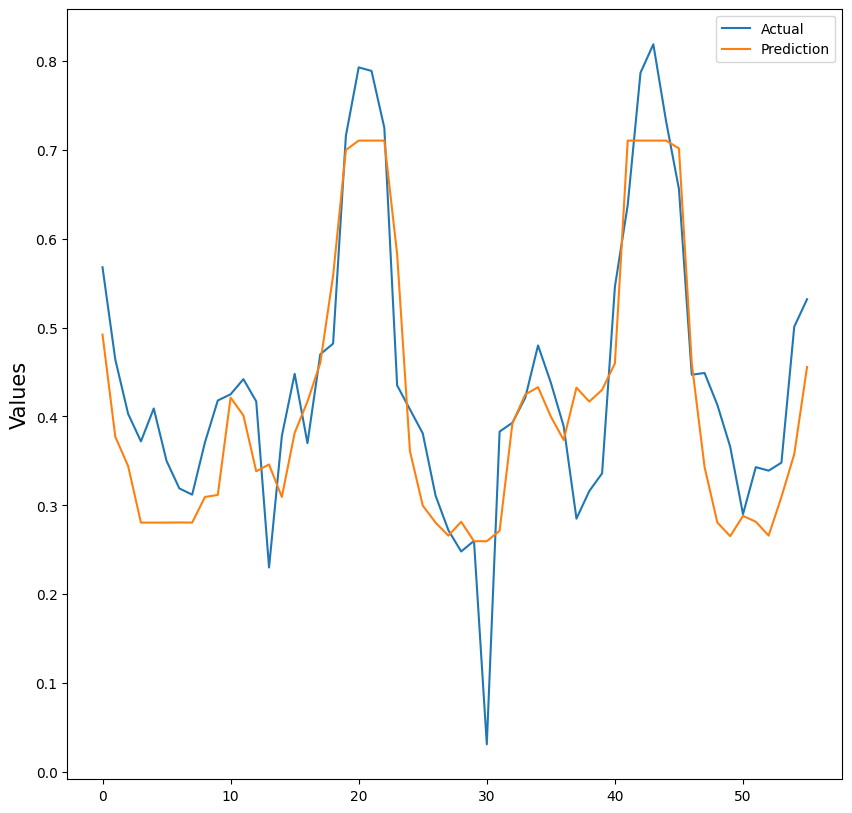

    prediction  actual
0     0.492258   0.568
1     0.377196   0.464
2     0.344173   0.403
3     0.280541   0.372
4     0.280541   0.409
5     0.280541   0.350
6     0.280689   0.319
7     0.280541   0.312
8     0.309429   0.371
9     0.311666   0.418
10    0.421270   0.425
11    0.401169   0.442
12    0.338287   0.417
13    0.345996   0.230
14    0.309429   0.378
15    0.381528   0.448
16    0.416916   0.370
17    0.460180   0.470
18    0.558282   0.482
19    0.699953   0.716
20    0.710580   0.793
21    0.710580   0.789
22    0.710580   0.725
23    0.582666   0.435
24    0.360982   0.408
25    0.299746   0.381
26    0.280541   0.311
27    0.265877   0.272
28    0.281484   0.248
29    0.259570   0.260
30    0.259570   0.031
31    0.271362   0.383
32    0.392367   0.393
33    0.424707   0.421
34    0.432967   0.480
35    0.399873   0.438
36    0.373599   0.389
37    0.432501   0.285
38    0.416754   0.316
39    0.429968   0.336
40    0.459713   0.546
41    0.710580   0.638
42    0.710

0.08095302903965644

In [24]:
%%time
transformer = nn.generate_transformer(
                    look_back = 23,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

lstm = nn.generate_rnn(look_back = 23,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

cnn = nn.generate_cnn(look_back = 23,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")

from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [cnn, lstm, transformer], regressor = 'catboost')
ensemble_model.fit(dataset, 
                   train_size = 0.9, 
                   look_back = 23, 
                   val_size = 0.1, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 16)
ensemble_model.eval(get="rmse")


2/2 [==============================] - 0s 2ms/step
model 0 : <class 'keras.engine.sequential.Sequential'>, mape = 0.33284309782102434 

2/2 [==============================] - 0s 4ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, mape = 0.303544418173966 

2/2 [==============================] - 0s 37ms/step
model 2 : <class 'keras.engine.functional.Functional'>, mape = 0.31766432494070795 



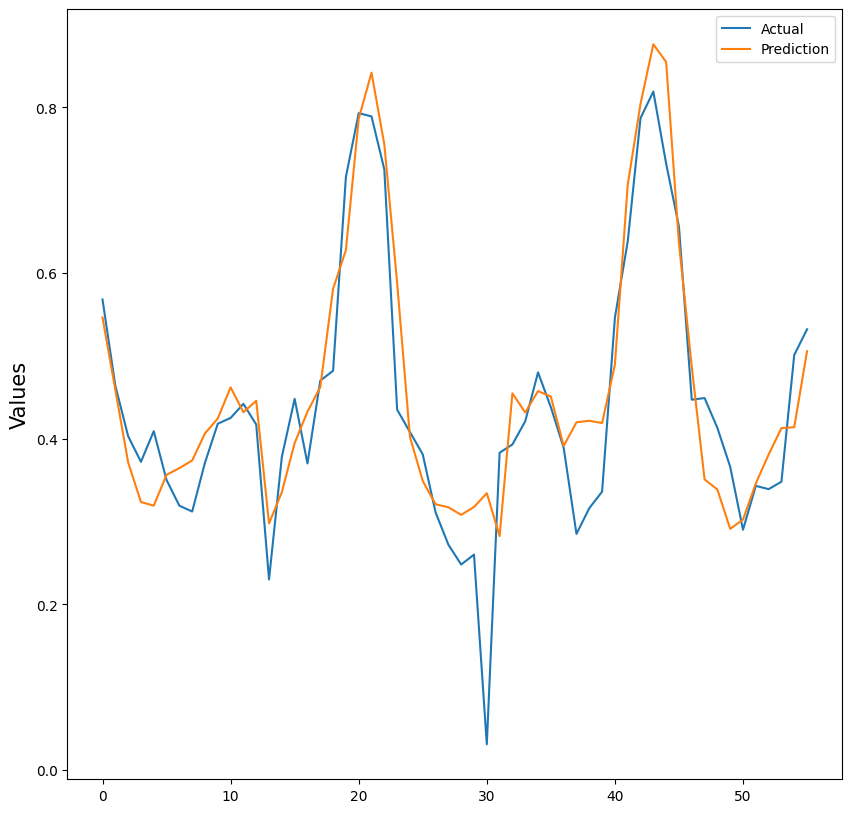

    prediction  actual
0     0.546269   0.568
1     0.459040   0.464
2     0.371458   0.403
3     0.323507   0.372
4     0.319057   0.409
5     0.356309   0.350
6     0.364450   0.319
7     0.373637   0.312
8     0.406358   0.371
9     0.424312   0.418
10    0.461986   0.425
11    0.431892   0.442
12    0.445641   0.417
13    0.297646   0.230
14    0.335398   0.378
15    0.394749   0.448
16    0.432516   0.370
17    0.462185   0.470
18    0.580920   0.482
19    0.627608   0.716
20    0.786267   0.793
21    0.841832   0.789
22    0.755229   0.725
23    0.588084   0.435
24    0.402082   0.408
25    0.348913   0.381
26    0.320802   0.311
27    0.317139   0.272
28    0.307977   0.248
29    0.317445   0.260
30    0.334159   0.031
31    0.282423   0.383
32    0.454689   0.393
33    0.431546   0.421
34    0.457414   0.480
35    0.450851   0.438
36    0.391205   0.389
37    0.419750   0.285
38    0.421580   0.316
39    0.418797   0.336
40    0.489382   0.546
41    0.706382   0.638
42    0.804

0.07269344666087998

In [22]:
%%time
transformer = nn.generate_transformer(
                    look_back = 23,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

lstm = nn.generate_rnn(look_back = 23,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

cnn = nn.generate_cnn(look_back = 23,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")

from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [cnn, lstm, transformer], regressor = 'wmean')
ensemble_model.fit(dataset, 
                   train_size = 0.9, 
                   look_back = 23, 
                   val_size = 0.1, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 16, 
                   metric = "mape")
ensemble_model.eval(get="rmse")


model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, mape = 0.30525838539513483 

2/2 [==============================] - 0s 3ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, mape = 0.4323657263521078 

2/2 [==============================] - 0s 4ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, mape = 0.45585602303786243 

2/2 [==============================] - 0s 44ms/step
model 3 : <class 'keras.engine.functional.Functional'>, mape = 0.41865026174551984 



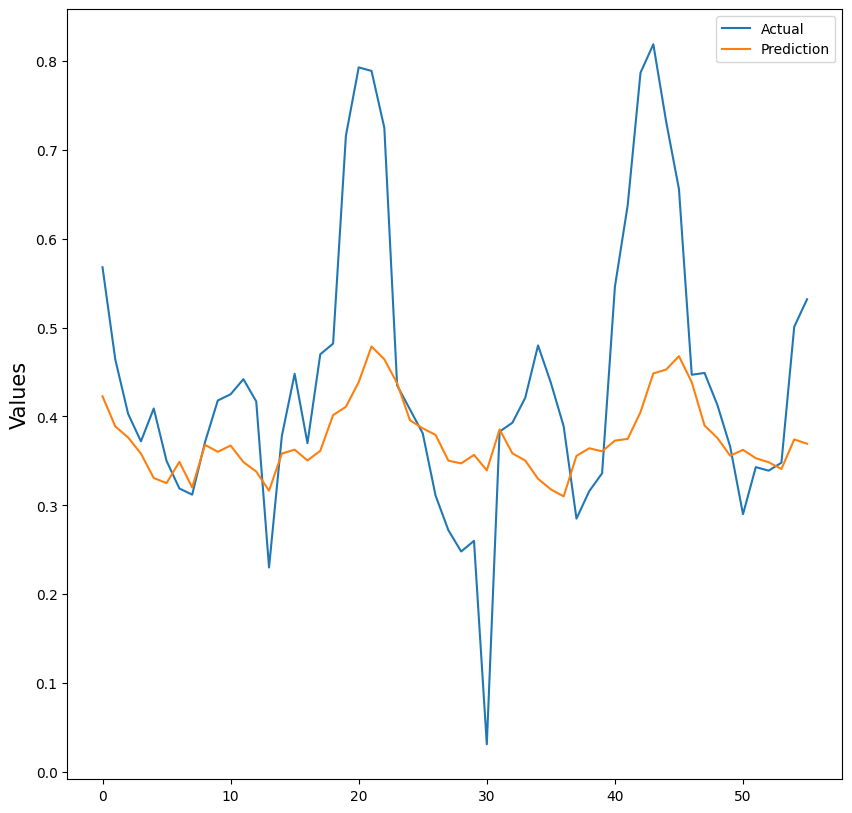

    prediction  actual
0     0.422702   0.568
1     0.388767   0.464
2     0.376385   0.403
3     0.358251   0.372
4     0.330744   0.409
5     0.325007   0.350
6     0.348977   0.319
7     0.320040   0.312
8     0.368063   0.371
9     0.360229   0.418
10    0.367296   0.425
11    0.348695   0.442
12    0.338042   0.417
13    0.316484   0.230
14    0.358210   0.378
15    0.362679   0.448
16    0.350487   0.370
17    0.361344   0.470
18    0.401521   0.482
19    0.410885   0.716
20    0.438686   0.793
21    0.478827   0.789
22    0.464393   0.725
23    0.437415   0.435
24    0.395787   0.408
25    0.386655   0.381
26    0.379297   0.311
27    0.350302   0.272
28    0.347188   0.248
29    0.356799   0.260
30    0.339267   0.031
31    0.385368   0.383
32    0.358475   0.393
33    0.350417   0.421
34    0.329878   0.480
35    0.317935   0.438
36    0.310056   0.389
37    0.355641   0.285
38    0.364239   0.316
39    0.360784   0.336
40    0.372836   0.546
41    0.374767   0.638
42    0.404

0.14669065512147114

In [23]:
%%time
transformer = nn.generate_transformer(
                    look_back = 23,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

lstm = nn.generate_rnn(look_back = 23,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

cnn = nn.generate_cnn(look_back = 23,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")

from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'wmean')
ensemble_model.fit(dataset, 
                   train_size = 0.9, 
                   look_back = 23, 
                   val_size = 0.1, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 16, 
                   metric = "mape",
                  fit_models = False)
ensemble_model.eval(get="rmse")


Также построим CNN LSTM модель.

4/4 [==============================] - 0s 3ms/step


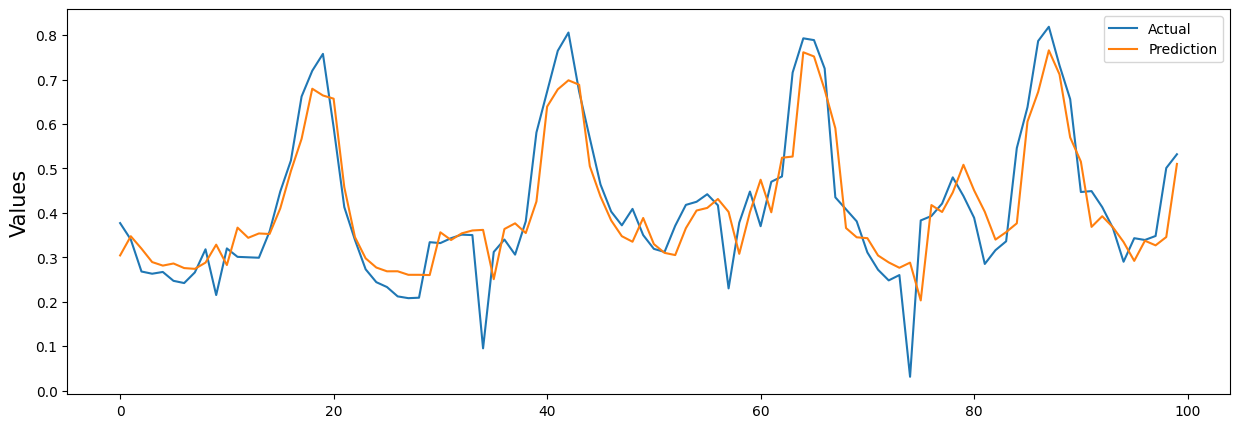

     prediction  actual
0      0.451829   0.455
1      0.502489   0.451
2      0.498520   0.499
3      0.550542   0.522
4      0.557162   0.650
..          ...     ...
106    0.291913   0.343
107    0.337295   0.339
108    0.326905   0.348
109    0.345619   0.501
110    0.510233   0.532

[111 rows x 2 columns]
RMSE = 0.07463992072099566, MSE = 0.005571117765236518, MAE = 0.05525991037405758, MAPE = 0.22428884834223248
CPU times: total: 14.6 s
Wall time: 9.23 s


In [19]:
%%time
seq = nn.make_seq_model(dataset, 
            layers = ["cnn", "lstm"], 
            look_back = 23, 
            units = 64,
            filters = 64,
            horizon = 1, 
            dropout = 0.0, 
            n_features = 1, 
            kernel_size = 2, 
            dilation_rate = 1, 
            dilation_mode = "multiplicative",
            optimizer = "Adam",
            loss = "mae",
            train_size = 0.8, 
            plot = True,
            batch_size = 16,
            epochs = 30,
            maxPlot = 100, 
            fig_size = (15, 5))

Построим предсказания на следующие n значений используя некоторые из моделей.

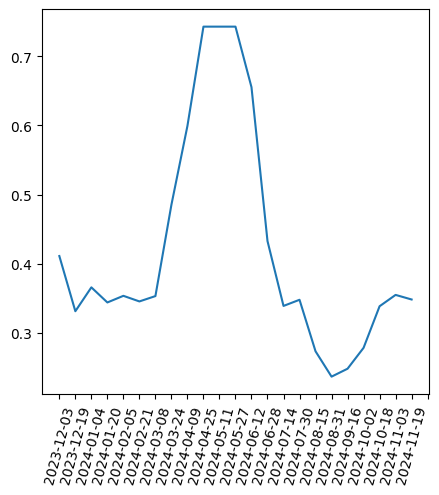

CPU times: total: 3.69 s
Wall time: 3.54 s


,predictions
2023-12-03,0.411329
2023-12-19,0.331606
2024-01-04,0.366094
2024-01-20,0.344277
2024-02-05,0.353861
2024-02-21,0.345766
2024-03-08,0.353473
2024-03-24,0.485402
2024-04-09,0.599278
2024-04-25,0.742653


In [14]:
%%time
ensemble_model.forecast(dataset, 23, fig_size = (5,5))

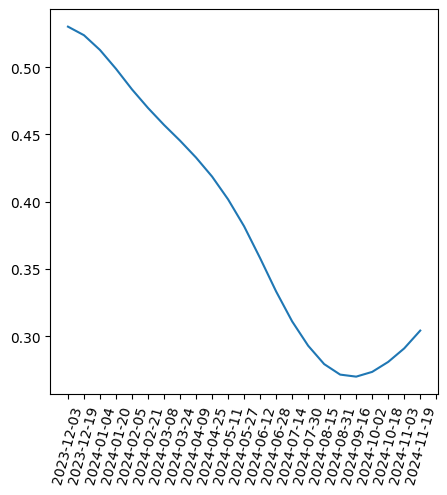

CPU times: total: 1.38 s
Wall time: 1.25 s


,predictions
2023-12-03,0.530206
2023-12-19,0.523825
2024-01-04,0.512841
2024-01-20,0.498839
2024-02-05,0.483523
2024-02-21,0.469710
2024-03-08,0.457099
2024-03-24,0.445398
2024-04-09,0.432822
2024-04-25,0.418717


In [17]:
%%time
utils.model_forecast(seq, dataset, 23, fig_size = (5,5))

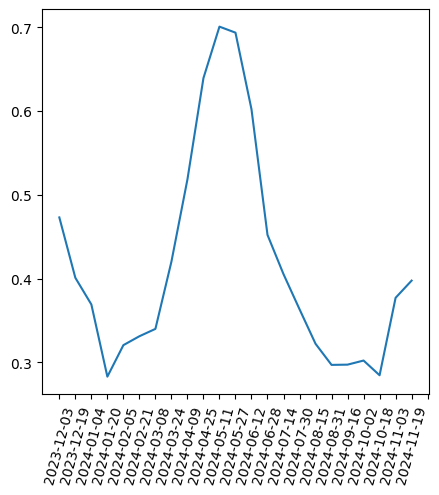

CPU times: total: 15.1 s
Wall time: 11.2 s


,predictions
2023-12-03,0.473030
2023-12-19,0.400979
2024-01-04,0.369151
2024-01-20,0.282993
2024-02-05,0.320582
2024-02-21,0.331204
2024-03-08,0.339985
2024-03-24,0.420258
2024-04-09,0.518397
2024-04-25,0.639302


In [18]:
%%time
utils.model_forecast(ar, dataset, 23, fig_size = (5,5))